In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [19]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

In [3]:
# download fashion mnist dataset using keras.
from tensorflow.keras import datasets

In [4]:
from numpy.random import seed
seed(42)

In [5]:
fashion_mnist_dataset = datasets.fashion_mnist
(train_images_dataset, train_labels), (test_images_dataset, test_labels) = fashion_mnist_dataset.load_data()

In [6]:
# list of unique categories in fashion mnist
categories = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
# dimensions of training data
print("dimensions of training data: {shape}".format(shape=train_images_dataset.shape))
print("dimensions of training data: {shape}".format(shape=train_labels.shape))

# dimensions of test set
print("dimensions of test set: {shape}".format(shape=test_images_dataset.shape))
print("dimensions of test set: {shape}".format(shape=test_labels.shape))

dimensions of training data: (60000, 28, 28)
dimensions of training data: (60000,)
dimensions of test set: (10000, 28, 28)
dimensions of test set: (10000,)


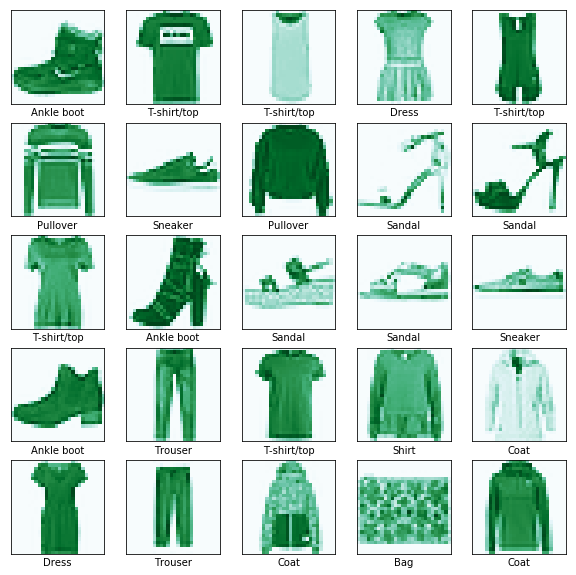

In [17]:
# diplay random images from training dataset
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images_dataset[i], cmap="BuGn")
    plt.xlabel(categories[train_labels[i]])
plt.show()

In [18]:
IMG_ROWS = 28
IMG_COLS = 28
NUM_CLASSES = 10
TEST_SIZE = 0.2
# RANDOM_STATE = 2018
#Model
NO_EPOCHS = 50
BATCH_SIZE = 128

In [22]:
# preprocessing (standardization) dataset
train_data_mean = np.mean(train_images_dataset[0])
train_data_stdev = np.std(train_images_dataset[0])
train_data = (train_images_dataset - train_data_mean)/train_data_stdev
test_data = (test_images_dataset - train_data_mean)/train_data_stdev

In [62]:
#Model
model = Sequential()
# Add convolution 2D
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(NUM_CLASSES, activation='softmax'))
model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

In [63]:
traindata = train_data.reshape(60000, IMG_ROWS, IMG_COLS, 1)
testdata = test_data.reshape(10000, IMG_ROWS, IMG_COLS, 1)

In [64]:
testdata.shape

(10000, 28, 28, 1)

In [65]:
train_model = model.fit(traindata, train_labels, batch_size=BATCH_SIZE, epochs=30, verbose=1, validation_data=(testdata, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 33s 549us/sample - loss: 0.5909 - acc: 0.7840 - val_loss: 0.4049 - val_acc: 0.8487
Epoch 2/30
60000/60000 [==============================] - 34s 560us/sample - loss: 0.3760 - acc: 0.8620 - val_loss: 0.3311 - val_acc: 0.8798
Epoch 3/30
60000/60000 [==============================] - 32s 530us/sample - loss: 0.3237 - acc: 0.8815 - val_loss: 0.2913 - val_acc: 0.8940
Epoch 4/30
60000/60000 [==============================] - 29s 489us/sample - loss: 0.2920 - acc: 0.8937 - val_loss: 0.2803 - val_acc: 0.8968
Epoch 5/30
60000/60000 [==============================] - 30s 495us/sample - loss: 0.2697 - acc: 0.9016 - val_loss: 0.2653 - val_acc: 0.9026
Epoch 6/30
60000/60000 [==============================] - 34s 560us/sample - loss: 0.2524 - acc: 0.9074 - val_loss: 0.2709 - val_acc: 0.9013
Epoch 7/30
60000/60000 [==============================] - 32s 528us/sample - loss: 0.2401 - acc: 0.9111 

In [66]:
print(train_model.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


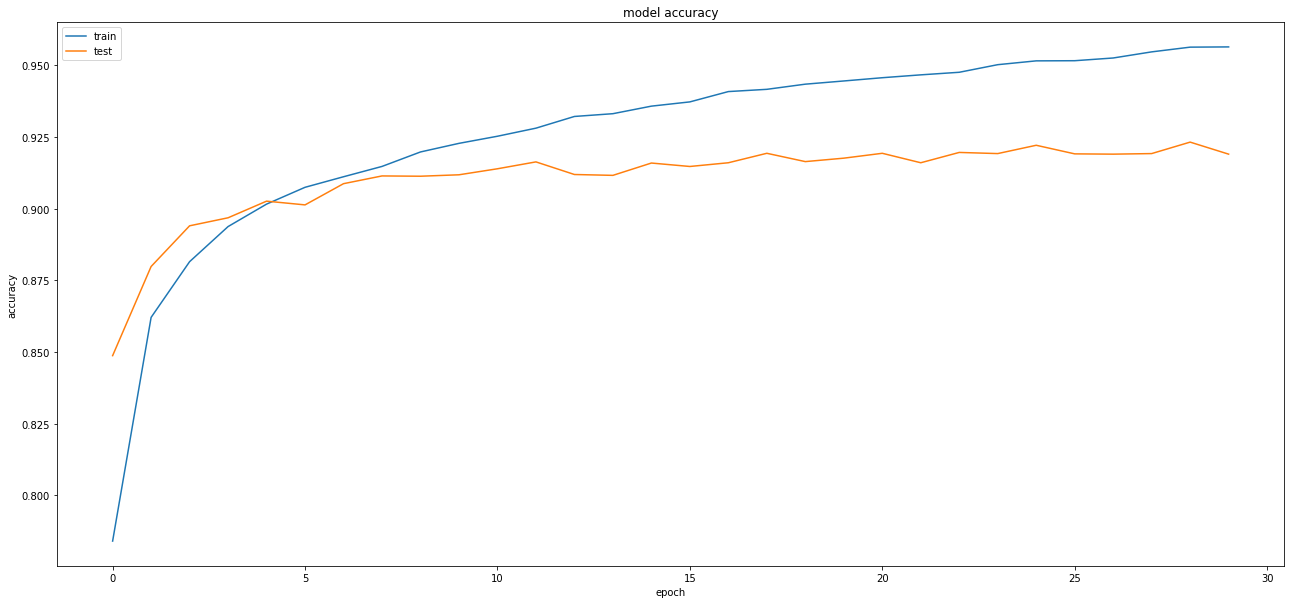

In [68]:
plt.figure(figsize=(22, 10))
plt.plot(train_model.history['acc'])
plt.plot(train_model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
# plt.ylim((0.9,.94))
plt.legend(['train', 'test'], loc='upper left')
plt.show()

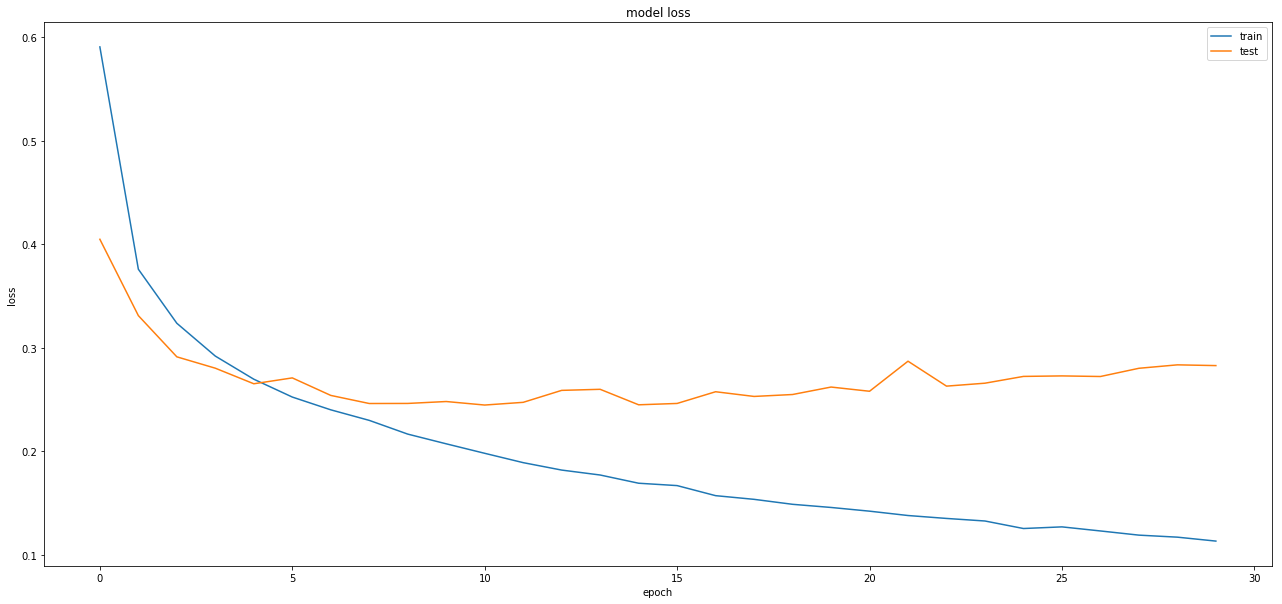

In [69]:
plt.figure(figsize=(22, 10))
plt.plot(train_model.history['loss'])
plt.plot(train_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
# plt.ylim((0,.3))
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [70]:
def create_trace(x,y,ylabel,color):
    trace = go.Scatter(
        x = x,y = y,
        name=ylabel,
        marker=dict(color=color),
        mode = "markers+lines",
        text=x
    )
    return trace

def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['acc']
    val_acc = hist['val_acc']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = list(range(1,len(acc)+1))
    
    trace_ta = create_trace(epochs,acc,"Training accuracy", "Green")
    trace_va = create_trace(epochs,val_acc,"Validation accuracy", "Red")
    trace_tl = create_trace(epochs,loss,"Training loss", "Blue")
    trace_vl = create_trace(epochs,val_loss,"Validation loss", "Magenta")
   
    fig = tools.make_subplots(rows=1,cols=2, subplot_titles=('Training and validation accuracy',
                                                             'Training and validation loss'))
    fig.append_trace(trace_ta,1,1)
    fig.append_trace(trace_va,1,1)
    fig.append_trace(trace_tl,1,2)
    fig.append_trace(trace_vl,1,2)
    fig['layout']['xaxis'].update(title = 'Epoch')
    fig['layout']['xaxis2'].update(title = 'Epoch')
    fig['layout']['yaxis'].update(title = 'Accuracy', range=[0,1])
    fig['layout']['yaxis2'].update(title = 'Loss', range=[0,1])

    
    iplot(fig, filename='accuracy-loss')

    

In [71]:
plot_accuracy_and_loss(train_model)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [72]:
#get the predictions for the test data
predicted_classes = model.predict_classes(testdata)
#get the indices to be plotted
# y_true = test_data.iloc[:, 0]

In [76]:
y_true = test_labels

In [75]:
predicted_classes

array([9, 2, 1, ..., 8, 1, 7], dtype=int64)

In [77]:
p = predicted_classes
y = y_true
correct = np.nonzero(p==y)[0]
incorrect = np.nonzero(p!=y)[0]

In [79]:
print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

Correct predicted classes: 9190
Incorrect predicted classes: 810


In [80]:
target_names = ["Class {} ({}) :".format(i,labels[i]) for i in range(NUM_CLASSES)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

                         precision    recall  f1-score   support

Class 0 (T-shirt/top) :       0.87      0.88      0.88      1000
    Class 1 (Trouser) :       1.00      0.98      0.99      1000
   Class 2 (Pullover) :       0.85      0.90      0.87      1000
      Class 3 (Dress) :       0.91      0.93      0.92      1000
       Class 4 (Coat) :       0.88      0.85      0.86      1000
     Class 5 (Sandal) :       0.99      0.98      0.99      1000
      Class 6 (Shirt) :       0.77      0.76      0.77      1000
    Class 7 (Sneaker) :       0.95      0.99      0.97      1000
        Class 8 (Bag) :       0.98      0.98      0.98      1000
 Class 9 (Ankle Boot) :       0.99      0.96      0.97      1000

            avg / total       0.92      0.92      0.92     10000



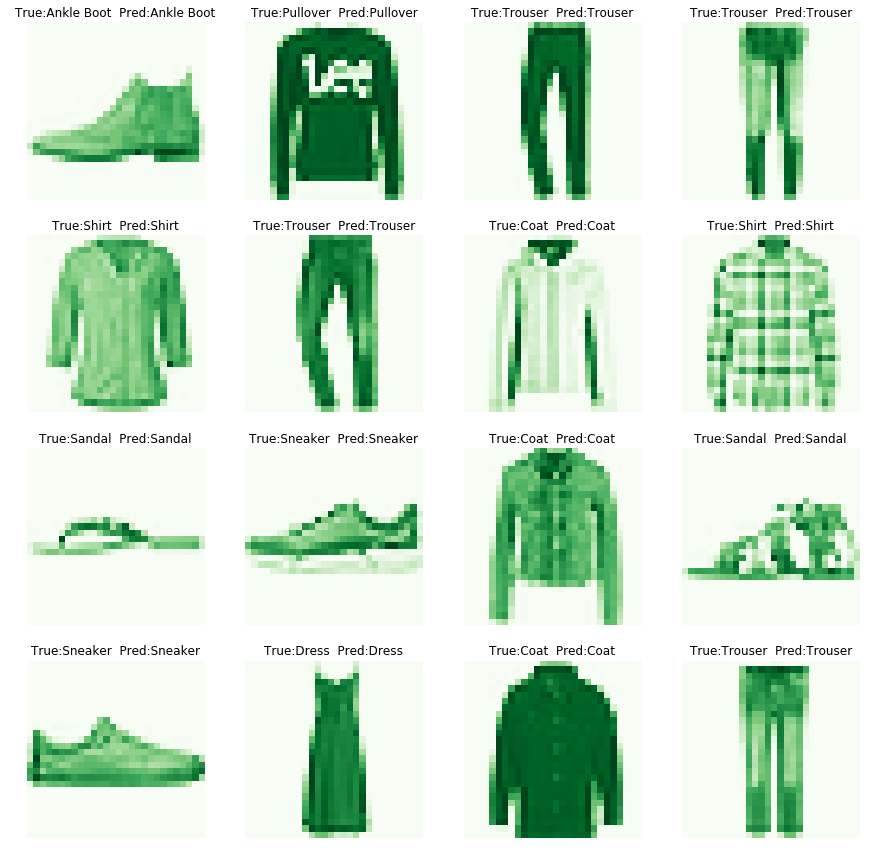

In [82]:
def plot_images(data_index,cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(4,4, figsize=(15,15))

    for i, indx in enumerate(data_index[:16]):
        ax[i//4, i%4].imshow(testdata[indx].reshape(IMG_ROWS,IMG_COLS), cmap=cmap)
        ax[i//4, i%4].axis('off')
        ax[i//4, i%4].set_title("True:{}  Pred:{}".format(labels[y_true[indx]],labels[predicted_classes[indx]]))
    plt.show()    
    
plot_images(correct, "Greens")

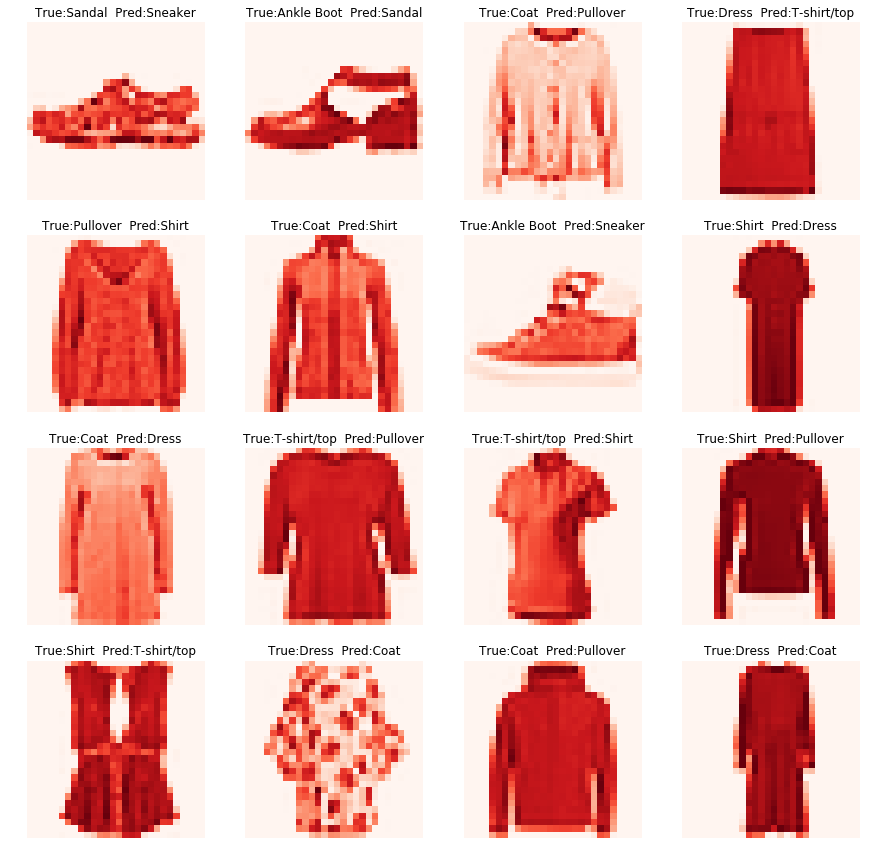

In [83]:
plot_images(incorrect, "Reds")